In [1]:
1+1

2

# Dialogue Time Length

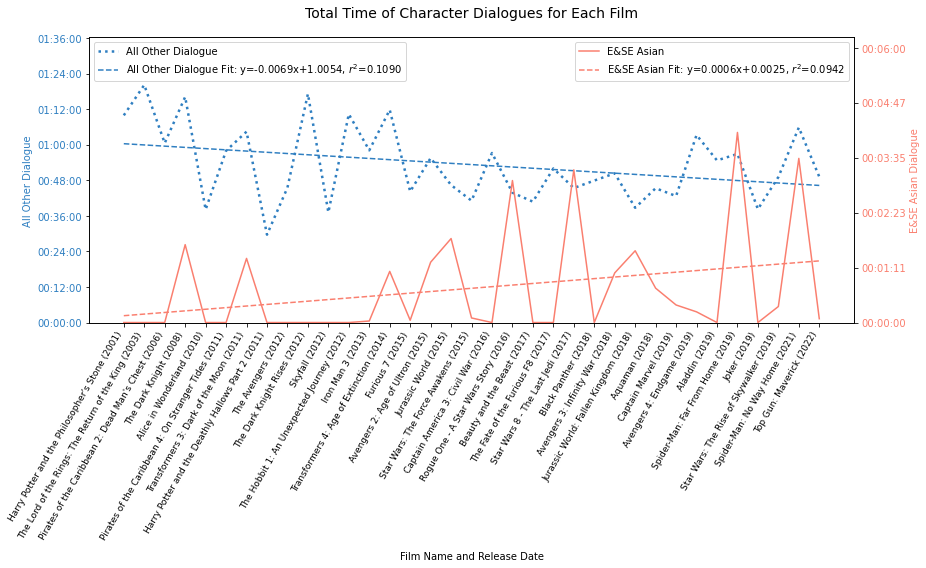

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
from scipy import stats

# read the data
df = pd.read_excel("/Users/dorothyhan/Desktop/Data Update_2026.01.13/Dialogue Length/DATA_Total Time of Dialogues.xlsx")
df['Time'] = pd.to_datetime(df['Time'], format='%B %d, %Y')

def time_to_seconds(t):
    return t.hour * 3600 + t.minute * 60 + t.second

# Apply the function to convert time to seconds
df['Asian'] = df['Asian'].apply(time_to_seconds)
df['Non-Asian'] = df['Non-Asian'].apply(time_to_seconds)

# Make sure your df is sorted by Year
df = df.sort_values('Time')

# Convert dialogue length from seconds to hours
df['Asian'] /= 3600
df['Non-Asian'] /= 3600

df['Time'] = pd.to_datetime(df['Time'])
df.sort_values('Time', inplace=True)

def hms_formatter(x, pos):
    h = int(x)
    m = int((x - h)*60)
    s = int(((x - h)*60 - m)*60)
    return f"{h:02d}:{m:02d}:{s:02d}"

# Create the formatter
formatter = FuncFormatter(hms_formatter)

# X-axis values will now be an array of integers from 0 to the length of your dataframe
x_values = np.arange(len(df))

# Initialize the figure and axis
fig, ax1 = plt.subplots(figsize=(13,8))
plt.xticks(fontsize=9)

# left y-axis
non_asian_line, = ax1.plot(x_values, df['Non-Asian'], label='All Other Dialogue', color='#2f7fc1', linestyle=':', linewidth=2.5)
ax1.set_xlabel('Film Name and Release Date', labelpad=10)
ax1.set_ylabel('All Other Dialogue', color='#2f7fc1')
ax1.yaxis.set_major_formatter(formatter)
ax1.tick_params(axis='y', labelcolor='#2f7fc1')

# right y-axis
ax2 = ax1.twinx()
asian_line, = ax2.plot(x_values, df['Asian'], label='E&SE Asian', color='#fa7f6f')
ax2.set_ylabel('E&SE Asian Dialogue', color='#fa7f6f')
ax2.yaxis.set_major_formatter(formatter)
ax2.tick_params(axis='y', labelcolor='#fa7f6f')


# Perform linear regression on the data
non_asian_slope, non_asian_intercept, non_asian_r_value, _, _ = stats.linregress(x_values, df['Non-Asian'])
asian_slope, asian_intercept, asian_r_value, _, _ = stats.linregress(x_values, df['Asian'])

# Draw the linear regression line on the graph
non_asian_line = ax1.plot(x_values, non_asian_slope*x_values + non_asian_intercept, label=f'All Other Dialogue Fit: y={non_asian_slope:.4f}x+{non_asian_intercept:.4f}, $r^2$={non_asian_r_value**2:.4f}', color='#2f7fc1', linestyle='--')
asian_line = ax2.plot(x_values, asian_slope*x_values + asian_intercept, label=f'E&SE Asian Fit: y={asian_slope:.4f}x+{asian_intercept:.4f}, $r^2$={asian_r_value**2:.4f}', color='#fa7f6f', linestyle='--')

# Add Legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Determine the range for the dialogue length
non_asian_range = (0, df['Non-Asian'].max() * 1.2)
asian_range = (0, df['Asian'].max() * 1.5)

# Set the range for the y-axis
ax1.set_ylim(non_asian_range)
ax2.set_ylim(asian_range)

# Set your x-ticks and x-ticklabels to be the index and date
ax1.set_xticks(x_values)
ax1.set_xticklabels(df['Name'], rotation=60, ha='right')

# Add a title
plt.title('Total Time of Character Dialogues for Each Film', pad=20, fontsize=14)

# Show the plot
plt.tight_layout()
plt.savefig(
    "Figure 1.png",
    dpi=300,
    bbox_inches='tight')
plt.show()

# Average value

In [3]:
#Total time

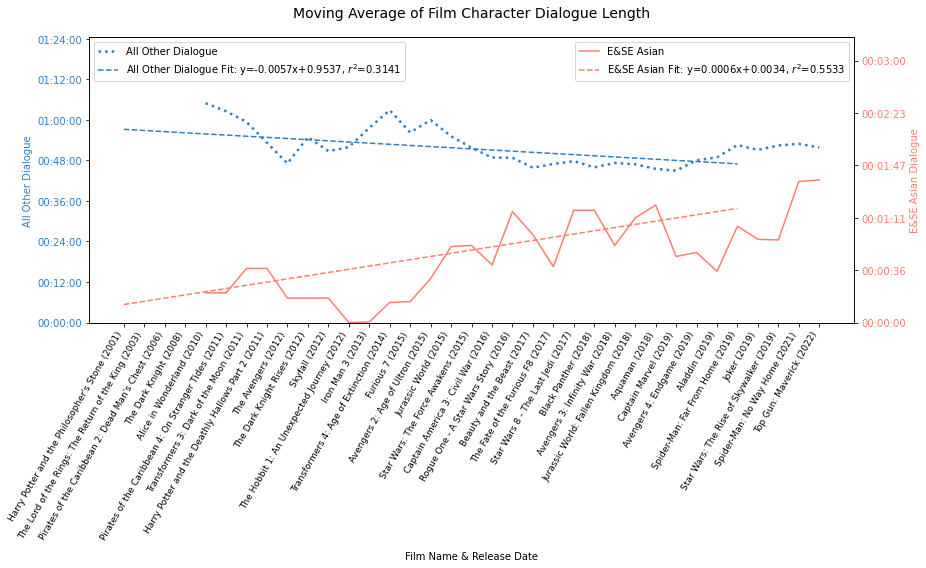

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_excel("/Users/dorothyhan/Desktop/Data Update_2026.01.13/Dialogue Length/DATA_Total Time of Dialogues.xlsx")
df['Time'] = pd.to_datetime(df['Time'], format='%B %d, %Y')

def time_to_seconds(t):
    return t.hour * 3600 + t.minute * 60 + t.second

# Apply the function to convert time to seconds
df['Asian'] = df['Asian'].apply(time_to_seconds)
df['Non-Asian'] = df['Non-Asian'].apply(time_to_seconds)

# Make sure df is sorted by Year
df = df.sort_values('Time')

# Convert dialogue length from seconds to hours
df['Asian'] /= 3600
df['Non-Asian'] /= 3600

# Compute moving averages over a window of 3
df['Asian_avg'] = df['Asian'].rolling(window=5).mean()
df['Non-Asian_avg'] = df['Non-Asian'].rolling(window=5).mean()

def hms_formatter(x, pos):
    h = int(x)
    m = int((x - h)*60)
    s = int(((x - h)*60 - m)*60)
    return f"{h:02d}:{m:02d}:{s:02d}"

# Create the formatter
formatter = FuncFormatter(hms_formatter)

# x-axis values will now be an array of integers from 0 to the length of your dataframe
x_values = np.arange(len(df))

# Initialize the figure and axis
fig, ax1 = plt.subplots(figsize=(13,8))
plt.xticks(fontsize=9)

# left y-axis
non_asian_line, = ax1.plot(x_values, df['Non-Asian_avg'], label='All Other Dialogue', color='#2f7fc1', linestyle=':', linewidth=2.5)
ax1.set_xlabel('Film Name & Release Date', labelpad=10)
ax1.set_ylabel('All Other Dialogue', color='#2f7fc1')
ax1.yaxis.set_major_formatter(formatter)
ax1.tick_params(axis='y', labelcolor='#2f7fc1')

# right y-axis
ax2 = ax1.twinx()
asian_line, = ax2.plot(x_values, df['Asian_avg'], label='E&SE Asian', color='#fa7f6f')
ax2.set_ylabel('E&SE Asian Dialogue', color='#fa7f6f')
ax2.yaxis.set_major_formatter(formatter)
ax2.tick_params(axis='y', labelcolor='#fa7f6f')

# Removing NaN values for the linear regression
df_non_asian_avg_no_na = df['Non-Asian_avg'].dropna()
df_asian_avg_no_na = df['Asian_avg'].dropna()

x_values_non_asian_avg_no_na = np.arange(len(df_non_asian_avg_no_na))
x_values_asian_avg_no_na = np.arange(len(df_asian_avg_no_na))

# Perform linear regression on the data
non_asian_slope, non_asian_intercept, non_asian_r_value, _, _ = stats.linregress(x_values_non_asian_avg_no_na, df_non_asian_avg_no_na)
asian_slope, asian_intercept, asian_r_value, _, _ = stats.linregress(x_values_asian_avg_no_na, df_asian_avg_no_na)

# Draw linear regression line
ax1.plot(x_values_non_asian_avg_no_na, non_asian_slope*x_values_non_asian_avg_no_na + non_asian_intercept, label=f'All Other Dialogue Fit: y={non_asian_slope:.4f}x+{non_asian_intercept:.4f}, $r^2$={non_asian_r_value**2:.4f}', color='#2f7fc1', linestyle='--')
ax2.plot(x_values_asian_avg_no_na, asian_slope*x_values_asian_avg_no_na + asian_intercept, label=f'E&SE Asian Fit: y={asian_slope:.4f}x+{asian_intercept:.4f}, $r^2$={asian_r_value**2:.4f}', color='#fa7f6f', linestyle='--')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Determine the range for the dialogue length
non_asian_range = (0, df['Non-Asian_avg'].max() * 1.3)
asian_range = (0, df['Asian_avg'].max() * 2.0)  # I have updated the range here

# Set the range for the y-axis
ax1.set_ylim(non_asian_range)
ax2.set_ylim(asian_range)

# set x-ticks and x-ticklabels to be the index and date
ax1.set_xticks(x_values)
ax1.set_xticklabels(df['Name'], rotation=60, ha='right')

# Add a title
plt.title('Moving Average of Film Character Dialogue Length', pad=20, fontsize=14)

# Show the plot
plt.tight_layout()
plt.savefig("Figure 2.png",
           dpi=300,
    bbox_inches='tight')
plt.show()
